In [ ]:
import json
import os
os.chdir('..')

with open('data/dataset_politifact.json', 'r') as f:
    data = json.load(f)
print("Columns: ", data[0].keys())
print("Total claims: ", len(data))

Columns:  dict_keys(['claim_id', 'claim', 'claim_factcheck_url', 'claim_author', 'claim_source', 'claim_date', 'fact_check_date', 'justification', 'fact_checking_sources', 'issue', 'label', 'queries', 'domain_authority_metrics', 'impact_analysis'])
Total claims:  2557


In [4]:
# Find the date range of claims
from datetime import datetime
dates = [claim['claim_date'] for claim in data]
# dates = [datetime.strptime(date, '%B %d, %Y') for date in dates] # format: 'August 25, 2024' 
dates = [datetime.strptime(date, '%d-%m-%Y') for date in dates if date] # format: '10-02-2019' 
print("Earliest claim date:", min(dates))
print("Latest claim date:", max(dates))

ValueError: time data 'November 2024' does not match format '%m-%d-%Y'

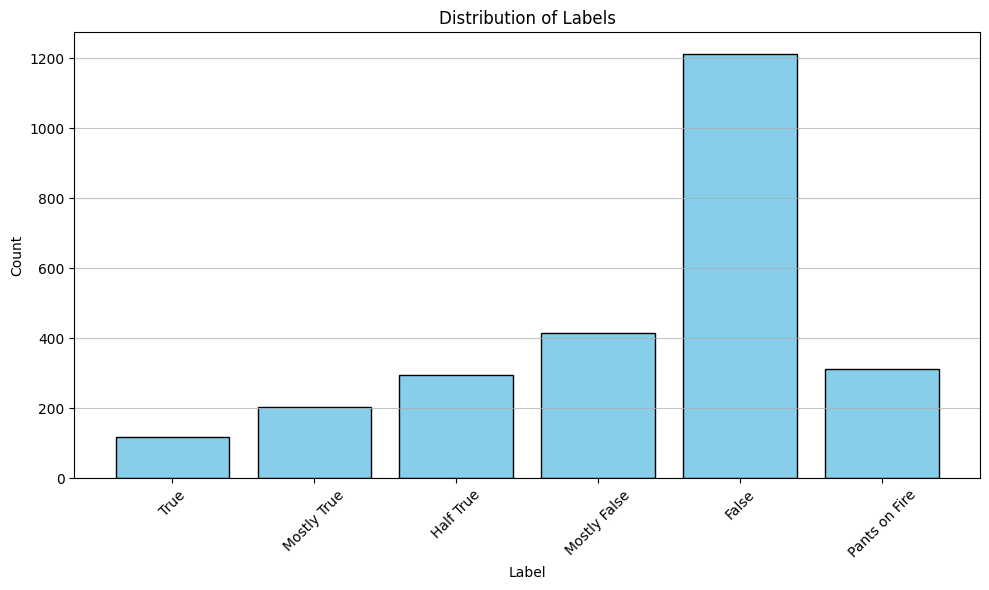

True: 117
Mostly True: 203
Half True: 295
Mostly False: 415
False: 1214
Pants on Fire: 313


In [4]:
# Let's plot label counts as a graph
from collections import Counter
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
label_counts = Counter([c['label'] for c in data])
plt.bar(list(label_counts.keys()), list(label_counts.values()), color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

for label, count in label_counts.items():
    print(f"{label}: {count}")

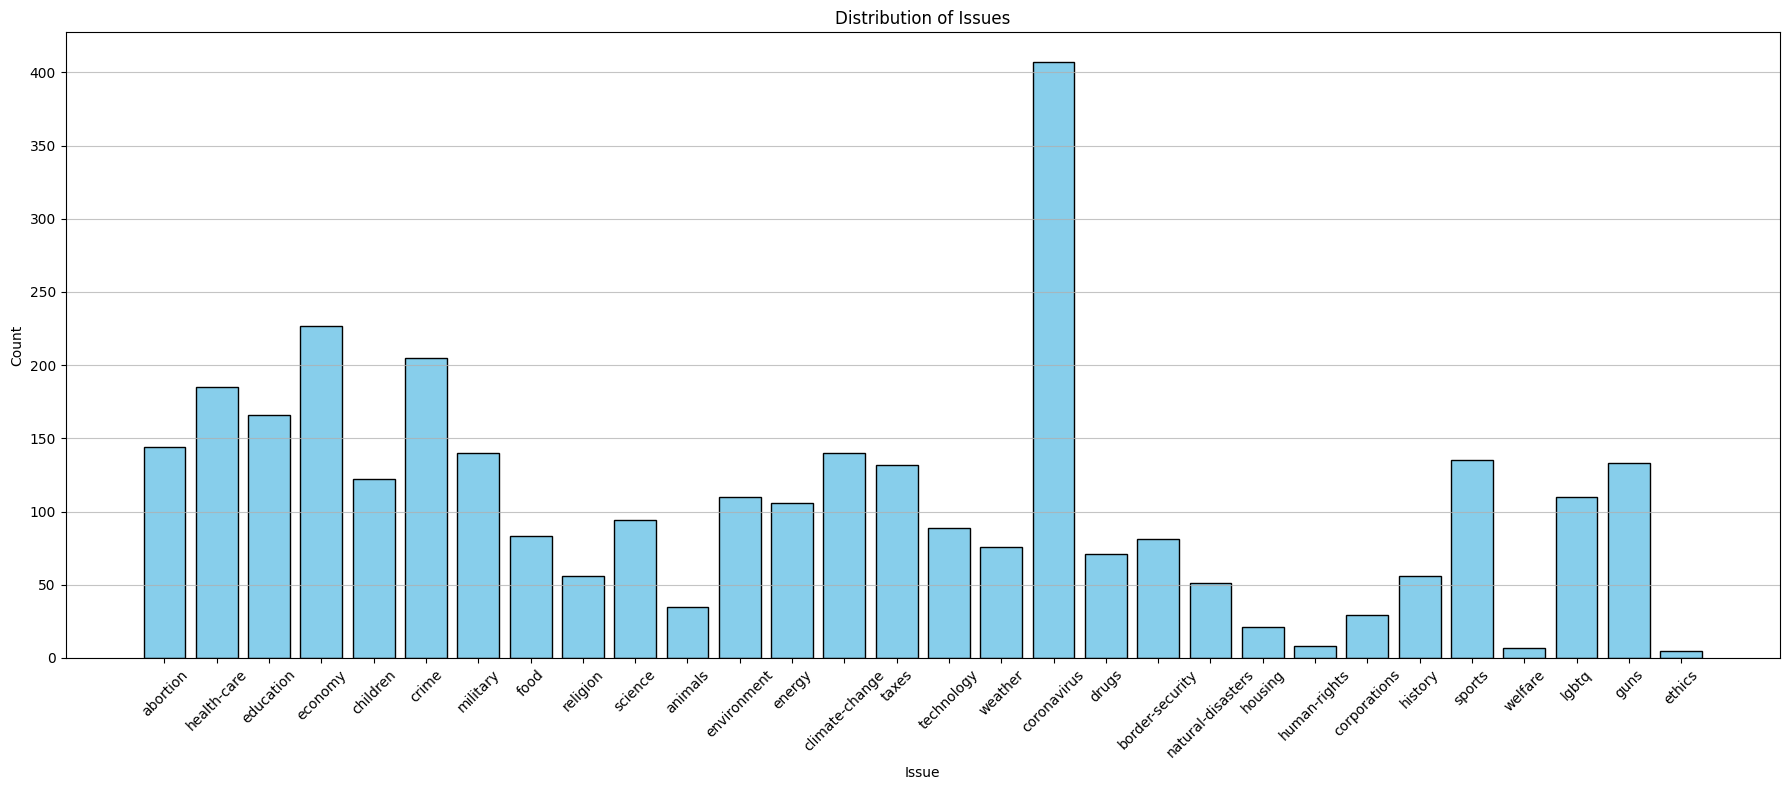

In [5]:
import ast

plt.figure(figsize=(18, 8))

issues_list = []
for c in data:
    try:
        issues_list.extend(ast.literal_eval(c['issue']))
    except:
        issues_list.append(c['issue'])
issue_counts = Counter(issues_list)

# sort the issues by count
# issue_counts = sorted(issue_counts.items(), key=lambda x: x[1], reverse=True)

plt.bar(list(issue_counts.keys()), list(issue_counts.values()), color='skyblue', edgecolor='black')
plt.title('Distribution of Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [9]:
# sorted(issue_counts.items(), key=lambda x: x[1], reverse=True)[:5]

len(issue_counts)

30

In [8]:
# Average number of queries per claim
import numpy as np

query_lengths = []
query_lengths = [len(c['queries']) for c in data]

print("MEAN #QUERIES:", np.mean(query_lengths))
print("MAX: #QUERIES", np.max(query_lengths))
print("MIN: #QUERIES", np.min(query_lengths))

MEAN #QUERIES: 3.7797527047913446
MAX: #QUERIES 14
MIN: #QUERIES 1
